# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [124]:
#Import all the necessary modules
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import preprocessing
%matplotlib inline

In [83]:
os.chdir("C:\Program Files\AIML PG")

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [127]:
pima_df = pd.read_csv('pima-indians-diabetes+(3).csv')
pima_df.columns
pima_df.rename(columns={'Preg':'Pregnancies','Plas':'Glucose','Pres':'BloodPressure',
                     'skin':'SkinThickness','test':'Insulin','mass':'BMI','pedi':'DiabetesPedigreeFunction',
                     'age':'Age','class':'Outcome'},inplace=True)

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [85]:
pima_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [86]:
print(pima_df.info())
print(pima_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
(768, 9)


In [87]:
pima_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [128]:
pima_df.replace(to_replace={'Glucose':0,'BloodPressure':0,'SkinThickness':0,'Insulin':0,'BMI':0},value={'Glucose':pima_df.Glucose.median(),'BloodPressure':pima_df.BloodPressure.median(),'SkinThickness':pima_df.SkinThickness.median(),'Insulin':pima_df.Insulin.median(),'BMI':pima_df.BMI.median()},inplace=True)

# Q5 Print the descriptive statistics of each & every column using describe() function

In [110]:
pima_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
Insulin,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
BMI,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

<BarContainer object of 2 artists>

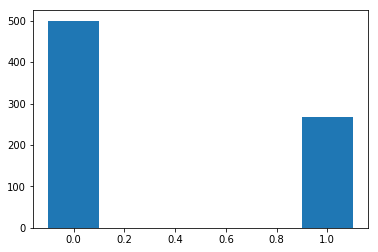

In [56]:
x_axis = pima_df.Outcome.unique()
height_value=[pima_df.Outcome[pima_df.Outcome==x].count() for x in x_axis]
plt.bar(x=x_axis,height=height_value,width=0.2)

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


Using the plot - infer the relationship between different variables

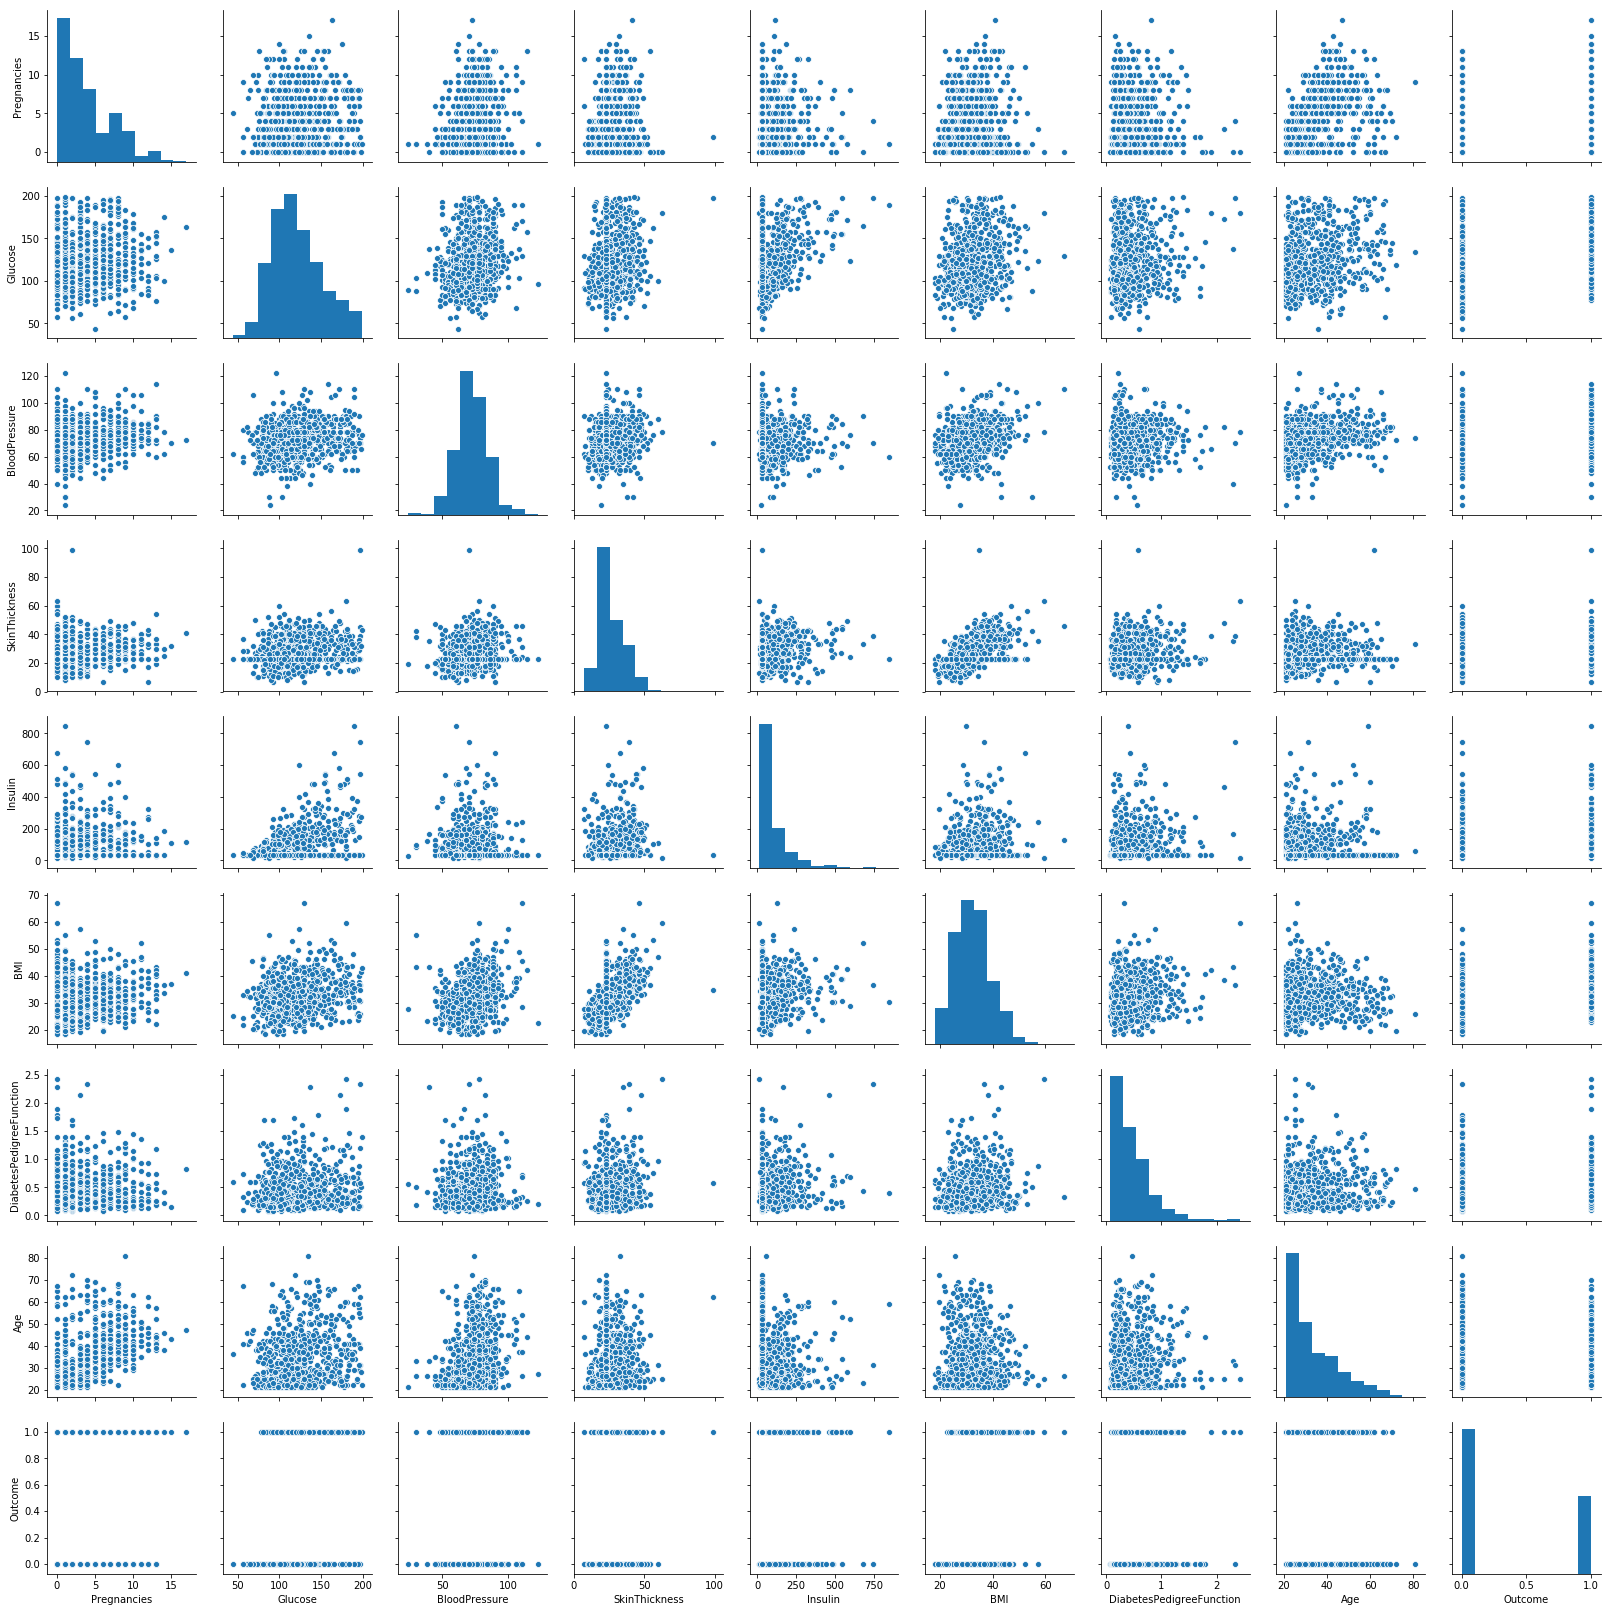

In [58]:
sb.pairplot(pima_df)

In [69]:
#pima_df.corrwith(pima_df.Glucose)
for col in pima_df.columns:
    print('Co-relation of {}'.format(col))
    print(pima_df.corrwith(pima_df[col]))
    print()
    

Co-relation of Pregnancies
Pregnancies                 1.000000
Glucose                     0.128213
BloodPressure               0.208615
SkinThickness               0.032568
Insulin                    -0.055697
BMI                         0.021546
DiabetesPedigreeFunction   -0.033523
Age                         0.544341
Outcome                     0.221898
dtype: float64

Co-relation of Glucose
Pregnancies                 0.128213
Glucose                     1.000000
BloodPressure               0.218937
SkinThickness               0.172143
Insulin                     0.357573
BMI                         0.231400
DiabetesPedigreeFunction    0.137327
Age                         0.266909
Outcome                     0.492782
dtype: float64

Co-relation of BloodPressure
Pregnancies                 0.208615
Glucose                     0.218937
BloodPressure               1.000000
SkinThickness               0.147809
Insulin                    -0.028721
BMI                         0.281132
D

Insights are 
1) Number of times a female is pregnant is proportional to age, which implies as the age is more number of pregnancies are more.
2) Amount of glucose is positively co-related(high) with outcome, which is obvious because amount of glucose in body is more for diabitic person.
3) Skin thickness is positively co-related(high) with BMI, which indicates thick skinned females are obese(more BMI)

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [129]:
train_data,test_data = train_test_split(pima_df,test_size=0.3,shuffle=True)
y_train = train_data['Outcome']
x_train = train_data.drop(columns='Outcome')
y_test = test_data['Outcome']
x_test = test_data.drop(columns='Outcome')

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [132]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# Q10 Print the accuracy of the model & print the confusion matrix 

In [133]:
metrics.accuracy_score(dt_model.predict(x_test),y_test)

0.7402597402597403

In [135]:
metrics.confusion_matrix(dt_model.predict(x_test),y_test)

array([[126,  29],
       [ 31,  45]], dtype=int64)

Print the feature importance of the decision model - Optional